## 모델의 성능 향상시키기

### 1. 데이터의 확인과 검증셋

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('C:\강의 교안\딥러닝\wine.csv', header=None)

df


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [47]:
#와인의 속성을 X로 와인의 분류를 Y로 저장함
X = df.iloc[:, 0:12]
Y = df.iloc[:, 12]

In [48]:
#학습셋과 테스트셋으로 나눔
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, shuffle=True)

model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
#모델을 컴파일함
model.compile(loss ='binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])

#모델을 실행함
history = model.fit(X_train, Y_train, epochs =50, batch_size =500, validation_split =0.25)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.2479 - loss: 42.4925 - val_accuracy: 0.2477 - val_loss: 35.3546
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2479 - loss: 29.6165 - val_accuracy: 0.2477 - val_loss: 22.6450
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2479 - loss: 17.1587 - val_accuracy: 0.2477 - val_loss: 10.0752
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2628 - loss: 5.1806 - val_accuracy: 0.7108 - val_loss: 0.6776
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7583 - loss: 0.8994 - val_accuracy: 0.7600 - val_loss: 1.1443
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7647 - loss: 1.1550 - val_accuracy: 0.7723 - val_loss: 1.0932
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7834 - loss: 0.9938 - val_accuracy: 0.7931 - val_loss: 0.8114
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7829 - loss: 0.7286 - val_accuracy: 0.7523 - val_loss: 0.6553
E

In [50]:
#테스트 결과를 출력
score = model.evaluate(X_test, Y_test)
print("Test accuracy:", score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9492 - loss: 0.1532 
Test accuracy: 0.9492307901382446


## 2. 모델 업데이트하기

### 기본 코드 불러오기

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#와인 데이터를 불러옴
df = pd.read_csv('C:\강의 교안\딥러닝\wine.csv', header=None)

#와인의 속성을 X로 와인의 분류를 Y로 저장
X=df.iloc[:,0:12]
Y=df.iloc[:,12]

#학습셋과 테스트셋으로 나눔
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, shuffle = True)

#모델 구조 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일함
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])



C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

### 모델의 저장 설정 및 실행
이전에는 학습이 끝난 뒤에 맨 마지막 것만 저장했다면, 중간중간 과정을 기록으로 남김

In [52]:
#모델 저장 조건을 설정
modelpath = './data/model/all/{epoch:02d}-{val_accuracy:.4f}.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

#모델을 실행함
#validation_split=0.25 : 25%는 검증용으로 사용 (모의고사를 위해 공부할 책 X_train의 일부를 떼어내기)
    #학습(Train)이 잘 되고 있는지, 과적합을 매 Epoch마다 실시
histroy=model.fit(X_train, Y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])
#callback(중간 개입자, Epoch끝날 때마다 특정 함수 실행): val_accuracy를 볼 때마다, 그 순간의 모델을 파일로 저장해주는 자동 저장장치


Epoch 1: saving model to ./data/model/all/01-0.7754.keras

Epoch 1: finished saving model to ./data/model/all/01-0.7754.keras

Epoch 2: saving model to ./data/model/all/02-0.7800.keras

Epoch 2: finished saving model to ./data/model/all/02-0.7800.keras

Epoch 3: saving model to ./data/model/all/03-0.8169.keras

Epoch 3: finished saving model to ./data/model/all/03-0.8169.keras

Epoch 4: saving model to ./data/model/all/04-0.9146.keras

Epoch 4: finished saving model to ./data/model/all/04-0.9146.keras

Epoch 5: saving model to ./data/model/all/05-0.9215.keras

Epoch 5: finished saving model to ./data/model/all/05-0.9215.keras

Epoch 6: saving model to ./data/model/all/06-0.9185.keras

Epoch 6: finished saving model to ./data/model/all/06-0.9185.keras

Epoch 7: saving model to ./data/model/all/07-0.9292.keras

Epoch 7: finished saving model to ./data/model/all/07-0.9292.keras

Epoch 8: saving model to ./data/model/all/08-0.9392.keras

Epoch 8: finished saving model to ./data/model/all/

In [53]:
#테스트 결과를 출력 
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.9585 - loss: 0.1344
Test accuracy: 0.9584615230560303


## 3. 그래프로 과적합 확인하기

In [54]:
from tensorflow.keras.callbacks import LambdaCallback #직접 만든 함수def 를 학습 도중 사용할 수 있는 콜백 형태로 바꿔주는 도구
import tensorflow as tf

def custom_log(epoch, logs): #몇번째 epoch인지, 성적표 
    if(epoch+1)%50 ==0: #50으로 나누었을 때 나머지가 0이냐? -> 50회, 100회, 150회 타이밍에 출력
        #50번에 한 번만 출력하는 필터링 
        num_batches = len(X_train)//500 #전체 데이터를 500(batch_size를 500으로 가정)으로 나눠서, 한 바퀴 돌 때 배치가 몇 덩어리인지 계산해
        print(f"Epoch {epoch+1}/2000")
        tf.print(f"{num_batches}/{num_batches}')--------------------"
        f"accuracy: {logs['accuracy']:.4f}' - loss: {logs['loss']:.4f}-"
        f"val_accuracy: {logs['val_accuracy']:.4f}' - val_loss: {logs['val_loss']:.4f}")
show_status = LambdaCallback(on_epoch_end=custom_log)
#oo_epoch_end = custom_log: custom_log 함수를 Epoch이 끝날 때마다 실행시켜줘
#custom_log 함수를 케라스 모델이 알 수 있는 'Callback형태'로 포장해주는 도구가 LambdaCallback 임 

In [55]:
#그래프 확인을 위한 긴 학습
history=model.fit(X_train, Y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose = 0, callbacks=show_status)


Epoch 50/2000
10/10')--------------------accuracy: 0.9715' - loss: 0.0901-val_accuracy: 0.9685' - val_loss: 0.0949
Epoch 100/2000
10/10')--------------------accuracy: 0.9795' - loss: 0.0705-val_accuracy: 0.9785' - val_loss: 0.0758
Epoch 150/2000
10/10')--------------------accuracy: 0.9831' - loss: 0.0597-val_accuracy: 0.9800' - val_loss: 0.0705
Epoch 200/2000
10/10')--------------------accuracy: 0.9836' - loss: 0.0530-val_accuracy: 0.9831' - val_loss: 0.0645
Epoch 250/2000
10/10')--------------------accuracy: 0.9841' - loss: 0.0497-val_accuracy: 0.9854' - val_loss: 0.0647
Epoch 300/2000
10/10')--------------------accuracy: 0.9851' - loss: 0.0462-val_accuracy: 0.9846' - val_loss: 0.0618
Epoch 350/2000
10/10')--------------------accuracy: 0.9869' - loss: 0.0466-val_accuracy: 0.9869' - val_loss: 0.0565
Epoch 400/2000
10/10')--------------------accuracy: 0.9882' - loss: 0.0442-val_accuracy: 0.9862' - val_loss: 0.0558
Epoch 450/2000
10/10')--------------------accuracy: 0.9887' - loss: 0.042

In [56]:
#history에 저장된 학습 결과를 확인
hist_df=pd.DataFrame(history.history)
hist_df

,accuracy,loss,val_accuracy,val_loss
0,0.948678,0.136584,0.948462,0.127823
1,0.950731,0.135242,0.950000,0.127873
2,0.948935,0.133055,0.950769,0.127089
3,0.950218,0.131825,0.954615,0.126179
4,0.950475,0.130714,0.950769,0.124377
...,...,...,...,...
1995,0.991789,0.027282,0.986154,0.069334
1996,0.992815,0.025797,0.983077,0.073687
1997,0.992558,0.026358,0.982308,0.068301
1998,0.992045,0.026247,0.985385,0.066486


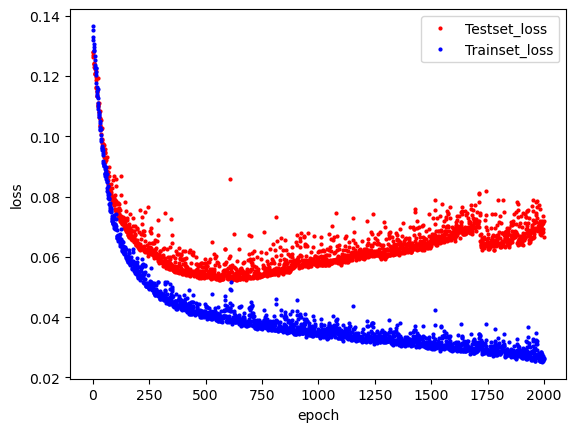

In [57]:
#Y_vloss에 검증셋의 오차를 저장
Y_vloss = hist_df ['val_loss']
#Y_loss에 훈련셋의 오차를 저장
Y_loss=hist_df['loss']
#X값을 지정, 검증셋의 오차를 빨간색, 학습셋의 오차를 파란색으로 표시 
X_len = np.arange(len(Y_loss))
plt.plot(X_len, Y_vloss, "o", c="red", markersize=2, label="Testset_loss")
plt.plot(X_len, Y_loss, "o", c="blue", markersize=2, label ="Trainset_loss")

plt.legend(loc = 'upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 4. 학습의 중단
### 기본 코드 불러오기

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

In [62]:

df = pd.read_csv('C:\강의 교안\딥러닝\wine.csv', header=None)


X=df.iloc[:,0:12]
Y=df.iloc[:,12]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, shuffle=True)


model=Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation ='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



C:\Users\User\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 30)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 12)             │           372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 8)              │           104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 875 (3.42 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

### 학습의 자동 중단 및 최적화 모델 저장

In [ ]:

#1. 성적 안오르면 20번 기다렸다가 멈춰!(브레이크 만들기)
#학습이 언제 자동 중단될지를 설정 (이전 그래프에서 빨간 점이 다시 올라가는 순간 학습을 멈추게 하는 자동 브레이크)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
# val_loss라는 학습 문제말고 모의고사 오차만 모니터링
# patience=20: 20번 연속으로 val_loss가 떨어지지 않으면 학습 중단

#2. 성적이 좋을 때마다  저장!(저장 장치 만들기)
#최적화 모델이 저장될 폴더와 모델 이름을 정함
modelpath = './data/model/bestmodel.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only = True)
#모델 실행 
#2000번 학습 , 500개씩 학습, 25%는 모의고사, callbacks=[early_stopping_callback, checkpointer]: 조기 종료, 최적화 모델 저장
history=model.fit(X_train, Y_train,  epochs=2000, batch_size=500, validation_split=0.25, verbose=1, callbacks=[early_stopping_callback, checkpointer])


Epoch 1/2000


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3667 - loss: 3.8070 - val_accuracy: 0.7808 - val_loss: 0.4495
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7667 - loss: 0.6379 - val_accuracy: 0.7715 - val_loss: 0.8096
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7711 - loss: 0.7811 - val_accuracy: 0.7969 - val_loss: 0.7282
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8196 - loss: 0.5968 - val_accuracy: 0.8685 - val_loss: 0.4236
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9135 - loss: 0.3159 - val_accuracy: 0.8992 - val_loss: 0.2920
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8840 - loss: 0.2988 - val_accuracy: 0.9285 - val_loss: 0.2528
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9330 - loss: 0.2550 - val_accuracy: 0.9215 - val_loss: 0.2590
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9338 - loss: 0.2525 - val_accuracy: 0.9292 - val_loss: 0.2387
Ep

In [ ]:
#테스트 결과 출력 
score = model.evaluate(X_test, Y_test)
print("Test accuracy:", score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.9838 - loss: 0.0453
Test accuracy: 0.983846127986908
